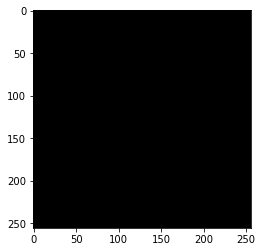

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


def image_decomposition(x):
    h, w, c = x.shape
    if c == 3: return x
    x = x.flatten().reshape(h*w, c)
    pca = PCA(n_components=3).fit(x)
    y = pca.transform(x)
    img = y.reshape(h, w, 3)
    img *= (255.0/img.max())
    return np.abs(img)


rng = np.random.default_rng()
x = rng.integers(0, 255, (256, 128, 10))
x = np.zeros((256, 256, 3))
img = image_decomposition(x)
plt.imshow(img)

In [ ]:
from stable_baselines3.common.buffers import ReplayBuffer